In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#data http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#
df = pd.read_csv('C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Unit 2\\credit_card_defaults.csv', header = 1)

In [22]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [26]:
#Select a subset of features to analyze

df2 = pd.DataFrame()
df2 = df.loc[:, ['EDUCATION', 'AGE', 'LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1', 'default payment next month']]

In [27]:
df2.head()

,EDUCATION,AGE,LIMIT_BAL,BILL_AMT1,PAY_AMT1,default payment next month
0,2,24,20000,3913,0,1
1,2,26,120000,2682,0,1
2,2,34,90000,29239,1518,0
3,2,37,50000,46990,2000,0
4,2,57,50000,8617,2000,0


In [38]:
df2.EDUCATION.unique()
#Education must be between 1-4 according to data descriptions --> DROP 0,5,6. 4 = 'OTHER', but since it is unknown it will
#obfuscate results. DROP 4 as well

df2 = df2[(df2['EDUCATION'] > 0) & (df2['EDUCATION'] < 4)]

c:\users\ryan\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


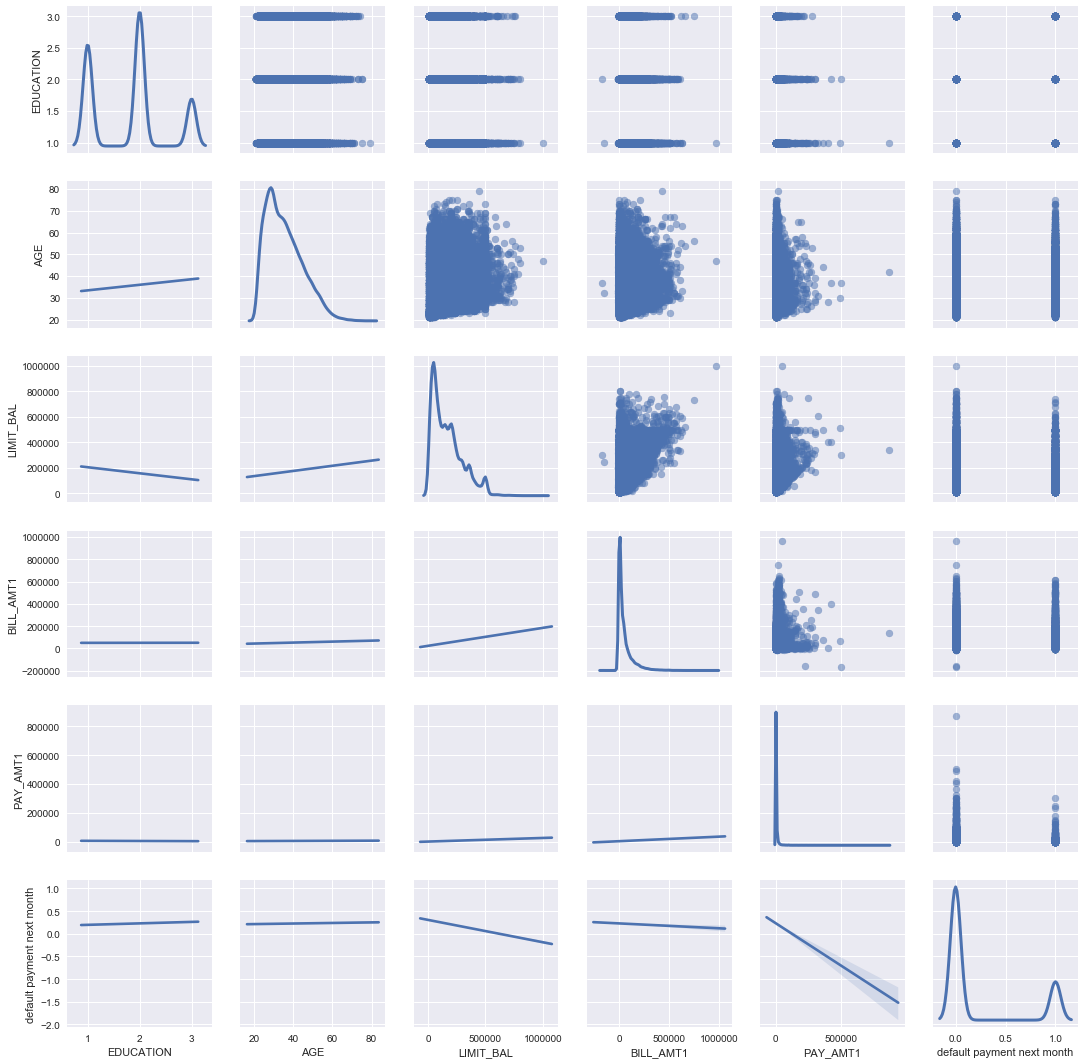

In [36]:
g = sns.PairGrid(df2.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                            EDUCATION       AGE  LIMIT_BAL  BILL_AMT1  \
EDUCATION                    1.000000  0.193978  -0.255138   0.003621   
AGE                          0.193978  1.000000   0.144006   0.054648   
LIMIT_BAL                   -0.255138  0.144006   1.000000   0.284648   
BILL_AMT1                    0.003621  0.054648   0.284648   1.000000   
PAY_AMT1                    -0.046129  0.025236   0.195858   0.140171   
default payment next month   0.054477  0.013863  -0.153508  -0.019070   

                            PAY_AMT1  default payment next month  
EDUCATION                  -0.046129                    0.054477  
AGE                         0.025236                    0.013863  
LIMIT_BAL                   0.195858                   -0.153508  
BILL_AMT1                   0.140171                   -0.019070  
PAY_AMT1                    1.000000                   -0.074075  
default payment next month -0.074075                    1.000000  


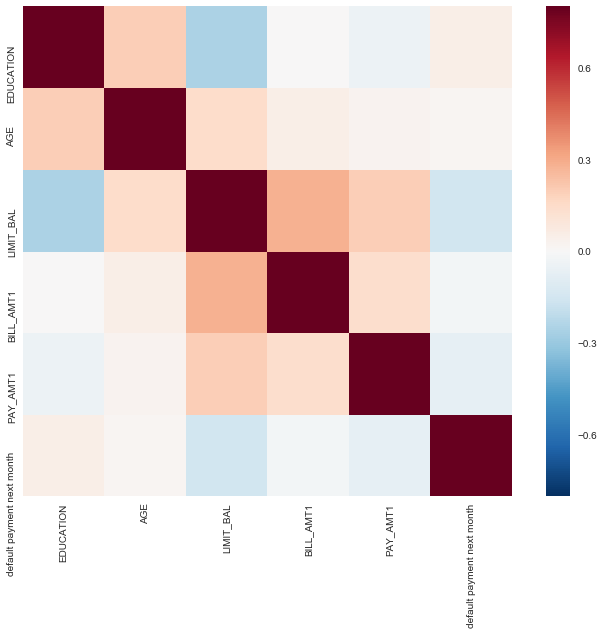

In [40]:
# Make the correlation matrix.
corrmat = df2.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

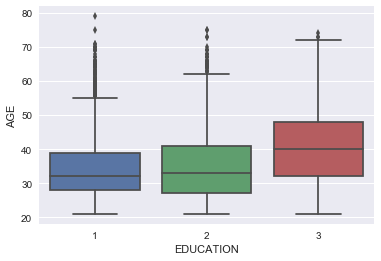

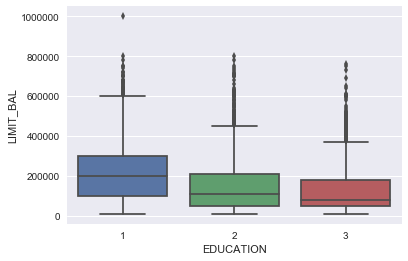

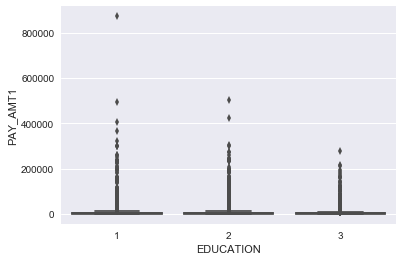

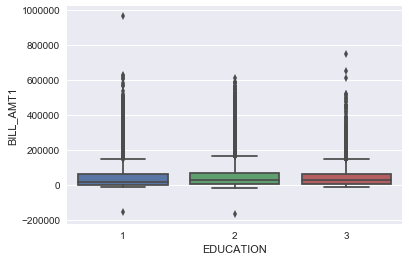

In [73]:
#Plot categorical w/ continuous using box-plots

%matplotlib inline

# Making a four-panel plot.

sns.boxplot(x = df2['EDUCATION'], y = df2['AGE'])
plt.show()

sns.boxplot(x = df2['EDUCATION'], y = df2['LIMIT_BAL'])
plt.show()

sns.boxplot(x = df2['EDUCATION'], y = df2['PAY_AMT1'])
plt.show()

sns.boxplot(x = df2['EDUCATION'], y = df2['BILL_AMT1'])
plt.show()

In [74]:
# Descriptive statistics by group.
print(df2.groupby('EDUCATION').describe())

                          AGE      BILL_AMT1       LIMIT_BAL       PAY_AMT1  \
EDUCATION                                                                     
1         count  10585.000000   10585.000000    10585.000000   10585.000000   
          mean      34.231838   48825.437506   212956.069910    6780.933585   
          std        8.270266   78624.876923   135474.936730   19783.265501   
          min       21.000000 -154973.000000    10000.000000       0.000000   
          25%       28.000000    1555.000000   100000.000000     460.000000   
          50%       32.000000   14202.000000   200000.000000    2500.000000   
          75%       39.000000   61331.000000   300000.000000    6102.000000   
          max       79.000000  964511.000000  1000000.000000  873552.000000   
2         count  14030.000000   14030.000000    14030.000000   14030.000000   
          mean      34.722096   53605.533999   147062.437634    5080.463293   
          std        8.893848   71827.924682   12067

In [84]:
import scipy.stats as stats
df3 = pd.DataFrame()
df3 = df2[['EDUCATION', 'default payment next month']]

# Test whether education differences are signficant in terms of default rate

print(df3.groupby('EDUCATION').mean())
print('Graduate School (1) vs. University (2)')
print(stats.ttest_ind(df3[df3.EDUCATION == 1]['default payment next month'] , 
                      df3[df3.EDUCATION == 2]['default payment next month']))

print('Graduate School (1) vs. High School (3)')
print(stats.ttest_ind(df3[df3.EDUCATION == 1]['default payment next month'] , 
                      df3[df3.EDUCATION == 3]['default payment next month']))

print('University (2) vs. High School (3)')
print(stats.ttest_ind(df3[df3.EDUCATION == 2]['default payment next month'] , 
                      df3[df3.EDUCATION == 3]['default payment next month']))

           default payment next month
EDUCATION                            
1                            0.192348
2                            0.237349
3                            0.251576
Graduate School (1) vs. University (2)
Ttest_indResult(statistic=-8.4777629384895494, pvalue=2.4225777058988602e-17)
Graduate School (1) vs. High School (3)
Ttest_indResult(statistic=-8.427843516071551, pvalue=3.8271565175552778e-17)
University (2) vs. High School (3)
Ttest_indResult(statistic=-2.0072889695168663, pvalue=0.044733079661457655)


In [ ]:
# All 3 levels of schooling have different means, with a p < 0.05, although University vs High School had a p value 0.045

#Two categorical variable visuals (and corresponding chi-square test) not included because age is ordinal, not categorical -- too many categories 

In [85]:
#Now for feature engineering 

df2.head()

,EDUCATION,AGE,LIMIT_BAL,BILL_AMT1,PAY_AMT1,default payment next month
0,2,24,20000,3913,0,1
1,2,26,120000,2682,0,1
2,2,34,90000,29239,1518,0
3,2,37,50000,46990,2000,0
4,2,57,50000,8617,2000,0


In [111]:
#FEATURES 1-3

#Feature 1: bill_amt1 / Limit_bal. Useful because we are seeing what % of available credit is being used - credit hungry?
df2['feat1'] = df2['BILL_AMT1'] / df2['LIMIT_BAL']

#Feature 2: pay_amt1 / bill_amt1. Useful because we are seeing what % of the bill the person pays that month
df2['feat2'] = df2['PAY_AMT1'] / df2['BILL_AMT1'] 

#Feature 3: Group ages together, as more datapoints in a group should prevent defaults from skewing rates in small populations

# Set a default value
df2['feat3'] = '0'
# Set Age_Group value for all row indexes which Age is LT 18
df2['feat3'][df2['AGE'] <= 18] = 'LTE 18'
# Same procedure for other age groups
df2['feat3'][(df2['AGE'] > 18) & (df2['AGE'] <= 30)] = '19-30'
df2['feat3'][(df2['AGE'] > 30) & (df2['AGE'] <= 40)] = '31-40'
df2['feat3'][(df2['AGE'] > 40) & (df2['AGE'] <= 50)] = '41-50'
df2['feat3'][(df2['AGE'] > 50) & (df2['AGE'] <= 60)] = '51-60' 
df2['feat3'][(df2['AGE'] > 60) & (df2['AGE'] <= 70)] = '61-70'
df2['feat3'][(df2['AGE'] > 70)] = '70+'
    
df2.head()

c:\users\ryan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\ryan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\ryan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\ryan\appdata\local\programs\python\python36-32\li

,EDUCATION,AGE,LIMIT_BAL,BILL_AMT1,PAY_AMT1,default payment next month,feat1,feat2,feat3
0,2,24,20000,3913,0,1,0.195650,0.000000,19-30
1,2,26,120000,2682,0,1,0.022350,0.000000,19-30
2,2,34,90000,29239,1518,0,0.324878,0.051917,31-40
3,2,37,50000,46990,2000,0,0.939800,0.042562,31-40
4,2,57,50000,8617,2000,0,0.172340,0.232099,51-60


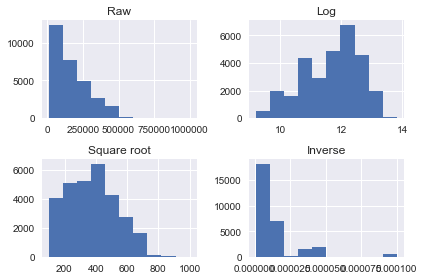

In [129]:
# FEATURES 4-6

fig = plt.figure()

fig.add_subplot(221)
plt.hist(df2['LIMIT_BAL'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df2['LIMIT_BAL'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df2['LIMIT_BAL'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df2['LIMIT_BAL'].dropna())
plt.title('Inverse')
plt.tight_layout()
plt.show()

#Feature 4: Log fcn looks more normal than 'raw' for LIMIT_BAL; will use it as a feature for test purposes
df2['feat4'] = np.log(df2['LIMIT_BAL'].dropna())


#Feature 5: Sqrt fcn looks more normal than 'raw' for LIMIT_BAL; will use it as a feature for test purposes
df2['feat5'] = np.sqrt(df2['LIMIT_BAL'].dropna())


#Feature 6: Available credit minus used credit
df2['feat6'] = df2['LIMIT_BAL'] - df2['BILL_AMT1']

In [130]:
df2.head(50)

,EDUCATION,AGE,LIMIT_BAL,BILL_AMT1,PAY_AMT1,default payment next month,feat1,feat2,feat3,feat4,feat5,feat6
0,2,24,20000,3913,0,1,0.195650,0.000000,19-30,9.903488,141.421356,16087
1,2,26,120000,2682,0,1,0.022350,0.000000,19-30,11.695247,346.410162,117318
2,2,34,90000,29239,1518,0,0.324878,0.051917,31-40,11.407565,300.000000,60761
3,2,37,50000,46990,2000,0,0.939800,0.042562,31-40,10.819778,223.606798,3010
4,2,57,50000,8617,2000,0,0.172340,0.232099,51-60,10.819778,223.606798,41383
5,1,37,50000,64400,2500,0,1.288000,0.038820,31-40,10.819778,223.606798,-14400
6,1,29,500000,367965,55000,0,0.735930,0.149471,19-30,13.122363,707.106781,132035
7,2,23,100000,11876,380,0,0.118760,0.031997,19-30,11.512925,316.227766,88124
8,3,28,140000,11285,3329,0,0.080607,0.294993,19-30,11.849398,374.165739,128715
9,3,35,20000,0,0,0,0.000000,NaN,31-40,9.903488,141.421356,20000


In [133]:
# FEATURE 7

#Feature 7: Will try the ratio of pay_amt1 / limit_bal to see if high payments relative to credit line affect the outcome
df2['feat7'] = df2['PAY_AMT1'] / df2['LIMIT_BAL']

In [139]:
#FEATURES 8, 9, and 10 will take the continuous numerical variables for LIMIT_BAL, PAY_AMT1, and BILL_AMT1 and normalize them
from sklearn import preprocessing

# Select only numeric variables to scale.
df_num = df2.loc[:, 'LIMIT_BAL' : 'PAY_AMT1'].select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
#plt.scatter(df_num['LIMIT_BAL'], df_scaled['LIMIT_BAL'])
#plt.show()

# Lookit all those matching means and standard deviations!
#print(df_scaled.describe())


df2['feat8'] = df_scaled['LIMIT_BAL']
df2['feat9'] = df_scaled['BILL_AMT1']
df2['feat10'] = df_scaled['PAY_AMT1']

df2.head()


,EDUCATION,AGE,LIMIT_BAL,BILL_AMT1,PAY_AMT1,default payment next month,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10
0,2,24,20000,3913,0,1,0.195650,0.000000,19-30,9.903488,141.421356,16087,0.000000,-1.133615,-0.640868,-0.340608
1,2,26,120000,2682,0,1,0.022350,0.000000,19-30,11.695247,346.410162,117318,0.000000,-0.363837,-0.657663,-0.340608
2,2,34,90000,29239,1518,0,0.324878,0.051917,31-40,11.407565,300.000000,60761,0.016867,-0.594770,-0.295339,-0.249166
3,2,37,50000,46990,2000,0,0.939800,0.042562,31-40,10.819778,223.606798,3010,0.040000,-0.902682,-0.053158,-0.220131
4,2,57,50000,8617,2000,0,0.172340,0.232099,51-60,10.819778,223.606798,41383,0.040000,-0.902682,-0.576691,-0.220131


In [142]:
df2.corr()

#Top 5 absolute corr values for default indicator are:

#feat4
#feat5
#LIMIT_BAL
#feat6
#feat1



,EDUCATION,AGE,LIMIT_BAL,BILL_AMT1,PAY_AMT1,default payment next month,feat1,feat2,feat4,feat5,feat6,feat7,feat8,feat9,feat10
EDUCATION,1.000000,0.193978,-0.255138,0.003621,-0.046129,0.054477,0.192377,0.007300,-0.263852,-0.267744,-0.257550,0.046481,0.004612,0.011783,-0.001152
AGE,0.193978,1.000000,0.144006,0.054648,0.025236,0.013863,-0.028954,-0.018752,0.134567,0.142582,0.113335,-0.033374,-0.021034,0.001600,-0.001645
LIMIT_BAL,-0.255138,0.144006,1.000000,0.284648,0.195858,-0.153508,-0.371335,-0.021077,0.900636,0.977612,0.840601,-0.144819,0.011440,0.000578,-0.006757
BILL_AMT1,0.003621,0.054648,0.284648,1.000000,0.140171,-0.019070,0.566963,0.007637,0.288538,0.291633,-0.279972,-0.009053,0.004989,0.004565,-0.005190
PAY_AMT1,-0.046129,0.025236,0.195858,0.140171,1.000000,-0.074075,-0.023620,-0.006310,0.176163,0.190925,0.116938,0.665404,-0.001194,-0.002312,-0.003346
default payment next month,0.054477,0.013863,-0.153508,-0.019070,-0.074075,1.000000,0.086382,-0.010505,-0.173323,-0.166899,-0.142953,-0.026070,-0.011391,0.001985,-0.005588
feat1,0.192377,-0.028954,-0.371335,0.566963,-0.023620,0.086382,1.000000,0.011566,-0.390794,-0.394666,-0.692218,0.086956,-0.009790,-0.000456,-0.004780
feat2,0.007300,-0.018752,-0.021077,0.007637,-0.006310,-0.010505,0.011566,1.000000,-0.013967,-0.017879,-0.025884,0.004529,0.008825,-0.000353,0.001124
feat4,-0.263852,0.134567,0.900636,0.288538,0.176163,-0.173323,-0.390794,-0.013967,1.000000,0.970236,0.738896,-0.195612,0.017689,0.005013,-0.002804
feat5,-0.267744,0.142582,0.977612,0.291633,0.190925,-0.166899,-0.394666,-0.017879,0.970236,1.000000,0.814234,-0.170945,0.014580,0.002285,-0.005385


c:\users\ryan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in log


ValueError: range parameter must be finite.

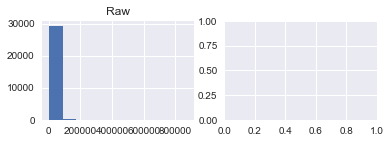

In [132]:
## Ask about this issue -- what are the error messages telling me?

fig = plt.figure()

fig.add_subplot(221)
plt.hist(df2['PAY_AMT1'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df2['PAY_AMT1'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df2['PAY_AMT1'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df2['PAY_AMT1'].dropna())
plt.title('Inverse')
plt.tight_layout()
plt.show()